
<a id='smoothing'></a>

# Consumption and Tax Smoothing with Complete and Incomplete Markets


<a id='index-0'></a>

## Contents

- [Consumption and Tax Smoothing with Complete and Incomplete Markets](#Consumption-and-Tax-Smoothing-with-Complete-and-Incomplete-Markets)  
  - [Overview](#Overview)  
  - [Background](#Background)  
  - [Model 1 (Complete Markets)](#Model-1-%28Complete-Markets%29)  
  - [Model 2 (One-Period Risk Free Debt Only)](#Model-2-%28One-Period-Risk-Free-Debt-Only%29)  
  - [Example: Tax Smoothing with Complete Markets](#Example:-Tax-Smoothing-with-Complete-Markets)  
  - [Linear State Space Version of Complete Markets Model](#Linear-State-Space-Version-of-Complete-Markets-Model)  

## Overview

This lecture describes two types of consumption-smoothing  and tax-smoothing models

- One is in the **complete markets** tradition of Lucas and Stokey [[LS83](https://julia.quantecon.org/../zreferences.html#id104)].  
- The other is in the **incomplete markets** tradition  of Hall [[Hal78](https://julia.quantecon.org/../zreferences.html#id81)] and Barro [[Bar79](https://julia.quantecon.org/../zreferences.html#id65)].  
- Complete markets* allow a consumer or government to buy or sell claims contingent on all possible states of the world.  
- Incomplete markets* allow a consumer or government to buy or sell only a limited set of securities, often only a single risk-free security.  


Hall [[Hal78](https://julia.quantecon.org/../zreferences.html#id81)] and Barro [[Bar79](https://julia.quantecon.org/../zreferences.html#id65)] both assumed that the only asset that can be traded is a risk-free one period bond.

Hall assumed an exogenous stochastic process of nonfinancial income and
an exogenous gross interest rate on one period risk-free debt that equals
$ \beta^{-1} $, where $ \beta \in (0,1) $ is also a consumer’s
intertemporal discount factor.

Barro [[Bar79](https://julia.quantecon.org/../zreferences.html#id65)] made an analogous assumption about the risk-free interest
rate in a tax-smoothing model that we regard as isomorphic to Hall’s
consumption-smoothing model.

We maintain Hall and Barro’s assumption about the interest rate when we describe an
incomplete markets version of our model.

In addition, we extend their assumption about the interest rate to an appropriate counterpart that we use in a “complete markets” model in the style of
Lucas and Stokey [[LS83](https://julia.quantecon.org/../zreferences.html#id104)].

While we are equally interested in consumption-smoothing and tax-smoothing
models, for the most part we focus explicitly on consumption-smoothing
versions of these models.

But for each version of the consumption-smoothing model there is a natural tax-smoothing counterpart obtained simply by

- relabeling consumption as tax collections and nonfinancial income as government expenditures  
- relabeling the consumer’s debt as the government’s *assets*  


For elaborations on this theme, please see [Optimal Savings II: LQ Techniques](https://julia.quantecon.org/perm_income_cons.html) and later parts of this lecture.

We’ll consider two closely related alternative assumptions about the consumer’s
exogenous nonfinancial income process (or in the tax-smoothing
interpretation, the government’s exogenous expenditure process):

- that it obeys a finite $ N $ state Markov chain (setting $ N=2 $ most of the time)  
- that it is described by a linear state space model with a continuous
  state vector in $ {\mathbb R}^n $ driven by a Gaussian vector iid shock
  process  


We’ll spend most of this lecture studying the finite-state Markov specification, but will briefly treat the linear state space specification before concluding.

### Relationship to Other Lectures

This lecture can be viewed as a followup to [Optimal Savings II: LQ Techniques](https://julia.quantecon.org/perm_income_cons.html) and  a warm up for a model of tax smoothing described in [opt_tax_recur](https://julia.quantecon.org/../dynamic_programming_squared/opt_tax_recur.html).

Linear-quadratic versions of the Lucas-Stokey tax-smoothing model are described in [lqramsey](https://julia.quantecon.org/../dynamic_programming_squared/lqramsey.html).

The key differences between those lectures and this one are

- Here the decision maker takes all prices as exogenous, meaning that his decisions do not affect them.  
- In [lqramsey](https://julia.quantecon.org/../dynamic_programming_squared/lqramsey.html) and [opt_tax_recur](https://julia.quantecon.org/../dynamic_programming_squared/opt_tax_recur.html), the decision maker – the government in the case of these lectures – recognizes that his decisions affect prices.  


So these later lectures are partly about how the government should  manipulate prices of government debt.

## Background

Outcomes in consumption-smoothing (or tax-smoothing) models emerge from two
sources:

- a decision maker – a consumer in the consumption-smoothing model or
  a government in the tax-smoothing model – who wants to maximize an
  intertemporal objective function that expresses its preference for
  paths of consumption (or tax collections) that are *smooth* in the
  sense of not varying across time and Markov states  
- a set of trading opportunities that allow the optimizer to transform
  a possibly erratic nonfinancial income (or government expenditure)
  process into a smoother consumption (or tax collections) process by
  purchasing or selling financial securities  


In the complete markets version of the model, each period the consumer
can buy or sell one-period ahead state-contingent securities whose
payoffs depend on next period’s realization of the Markov state.

In the two-state Markov chain case, there are two such securities each period.

In an $ N $ state Markov state version of the model,  $ N $ such securities are traded each period.

These state-contingent securities are commonly called Arrow securities, after [Kenneth Arrow](https://en.wikipedia.org/wiki/Kenneth_Arrow) who first theorized about them.

In the incomplete markets version of the model, the consumer can buy and sell only one security each period, a risk-free bond with gross return $ \beta^{-1} $.

### Finite State Markov Income Process

In each version of the consumption-smoothing model, nonfinancial income is governed by a two-state Markov chain (it’s easy to generalize this to an $ N $ state Markov chain).

In particular, the *state of the world* is given by $ s_t $ that follows
a Markov chain with transition probability matrix

$$
P_{ij} = \mathbb P \{s_{t+1} = \bar s_j \,|\, s_t = \bar s_i \}
$$

Nonfinancial income $ \{y_t\} $ obeys

$$
y_t =
\begin{cases}
    \bar y_1 & \quad \text{if } s_t = \bar s_1 \\
    \bar y_2 & \quad \text{if } s_t = \bar s_2
\end{cases}
$$

A consumer wishes to maximize


<a id='equation-cs-1'></a>
$$
\mathbb E
\left[
    \sum_{t=0}^\infty \beta^t u(c_t)
\right]
\quad
\text{where} \quad
u(c_t) = - (c_t -\gamma)^2
\quad \text{and} \quad
 0 < \beta < 1 \tag{40.1}
$$

#### Remark About Isomorphism

We can regard these as Barro [[Bar79](https://julia.quantecon.org/../zreferences.html#id65)]  tax-smoothing models if we set
$ c_t = T_t $ and $ G_t = y_t $, where $ T_t $ is total tax
collections and $ \{G_t\} $ is an exogenous government expenditures
process.

### Market Structure

The two models differ in how effectively the market structure allows the
consumer to transfer resources across time and Markov states, there
being more transfer opportunities in the complete markets setting than
in the incomplete markets setting.

Watch how these differences in opportunities affect

- how smooth consumption is across time and Markov states  
- how the consumer chooses to make his levels of indebtedness behave
  over time and across Markov states  

## Model 1 (Complete Markets)

At each date $ t \geq 0 $, the consumer trades **one-period ahead
Arrow securities**.

We assume that prices of these securities are exogenous to the consumer
(or in the tax-smoothing version of the model, to the government).

*Exogenous* means that they are unaffected by the  decision maker.

In Markov state $ s_t $ at time $ t $, one unit of consumption
in state $ s_{t+1} $ at time $ t+1 $ costs $ q(s_{t+1} \,|\, s_t) $ units of the time $ t $ consumption good.

At time $ t=0 $, the consumer starts with an inherited level of debt
due at time $ 0 $ of $ b_0 $ units of time $ 0 $ consumption
goods.

The consumer’s budget constraint at $ t \geq 0 $ in Markov
state $ s_t $ is

$$
c_t + b_t
\leq y(s_t) +
\sum_j  q(\bar s_j \,|\, s_t ) \, b_{t+1}(\bar s_j \,|\, s_t)
$$

where $ b_t $ is the consumer’s one-period debt that falls due at time $ t $ and  $ b_{t+1}(\bar s_j\,|\, s_t) $ are the consumer’s time
$ t $ sales of the  time $ t+1 $ consumption good in Markov state $ \bar s_j $, a source of time $ t $ revenues.

An analogue of Hall’s assumption that the one-period risk-free gross
interest rate is $ \beta^{-1} $ is


<a id='equation-cs-2'></a>
$$
q(\bar s_j \,|\, \bar s_i) = \beta P_{ij} \tag{40.2}
$$

To understand this, observe that in state $ \bar s_i $ it costs $ \sum_j q(\bar s_j \,|\, \bar s_i) $  to purchase one unit of consumption next period *for sure*, i.e., meaning no matter what state of the world  occurs at $ t+1 $.

Hence the implied price of a risk-free claim on one unit of consumption next
period is

$$
\sum_j q(\bar s_j \,|\, \bar s_i) =  \sum_j \beta P_{ij} =  \beta
$$

This confirms that [(40.2)](#equation-cs-2) is a natural analogue of Hall’s assumption about the
risk-free one-period interest rate.

First-order necessary conditions for maximizing the consumer’s expected utility are

$$
\beta \frac{u'(c_{t+1})}{u'(c_t) } \mathbb P\{s_{t+1}\,|\, s_t \}
    = q(s_{t+1} \,|\, s_t)
$$

or, under our assumption [(40.2)](#equation-cs-2) on Arrow security prices,


<a id='equation-cs-3'></a>
$$
c_{t+1} = c_t \tag{40.3}
$$

Thus, our consumer sets $ c_t = \bar c $ for all $ t \geq 0 $ for some value $ \bar c $ that it is our job now to determine.

**Guess:** We’ll make the plausible guess that


<a id='equation-eq-guess'></a>
$$
b_{t+1}(\bar s_j \,|\, s_t = \bar s_i) = b(\bar s_j) ,
        \quad i=1,2; \;\; j= 1,2 \tag{40.4}
$$

so that the amount borrowed today turns out to depend only on *tomorrow’s* Markov state. (Why is this is a plausible guess?).

To determine $ \bar c $, we shall pursue the implications of the consumer’s budget constraints in each Markov state today and  our guess [(40.4)](#equation-eq-guess) about the consumer’s debt level choices.

For $ t \geq 1 $, these imply


<a id='equation-cs-4a'></a>
$$
\begin{aligned}
    \bar c + b(\bar s_1) & = y(\bar s_1) + q(\bar s_1\,|\, \bar s_1) b(\bar s_1) + q(\bar s_2 \,|\, \bar s_1)  b(\bar s_2) \cr
    \bar c + b(\bar s_2) & = y(\bar s_2) + q(\bar s_1\,|\, \bar s_2) b(\bar s_1) + q(\bar s_2 \,|\, \bar s_2) b(\bar s_2),
\end{aligned} \tag{40.5}
$$

or

$$
\begin{bmatrix}
   b(\bar s_1) \cr b(\bar s_2)
\end{bmatrix} +
\begin{bmatrix}
\bar c \cr \bar c
\end{bmatrix}
=
\begin{bmatrix}
    y(\bar s_1) \cr y(\bar s_2)
\end{bmatrix}
+ \beta
\begin{bmatrix}
    P_{11} & P_{12} \cr P_{21} & P_{22}
\end{bmatrix}
\begin{bmatrix}
    b(\bar s_1) \cr b(\bar s_2)
\end{bmatrix}
$$

These are $ 2 $ equations in the $ 3 $ unknowns
$ \bar c, b(\bar s_1), b(\bar s_2) $.

To get a third equation, we assume that at time $ t=0 $, $ b_0 $
is the debt due; and we assume that at time $ t=0 $, the Markov
state is $ \bar s_1 $.

Then the budget constraint at time $ t=0 $ is


<a id='equation-cs-5'></a>
$$
\bar c + b_0 = y(\bar s_1) + q(\bar s_1 \,|\, \bar s_1) b(\bar s_1) + q(\bar s_2\,|\,\bar s_1) b(\bar s_2) \tag{40.6}
$$

If we substitute  [(40.6)](#equation-cs-5) into the first equation of [(40.5)](#equation-cs-4a) and rearrange, we
discover that


<a id='equation-cs-6'></a>
$$
b(\bar s_1) = b_0 \tag{40.7}
$$

We can then use the second equation of [(40.5)](#equation-cs-4a)  to deduce the restriction


<a id='equation-cs-7'></a>
$$
y(\bar s_1) - y(\bar s_2) + [q(\bar s_1\,|\, \bar s_1) - q(\bar s_1\,|\, \bar s_2) - 1 ] b_0 +
[q(\bar s_2\,|\,\bar s_1) + 1 - q(\bar s_2 \,|\, \bar s_2) ] b(\bar s_2) = 0 , \tag{40.8}
$$

an equation in the unknown $ b(\bar s_2) $.

Knowing $ b(\bar s_1) $ and $ b(\bar s_2) $, we can solve equation [(40.6)](#equation-cs-5)  for the constant level of consumption $ \bar c $.

### Key outcomes

The preceding calculations indicate that in the complete markets version
of our model, we obtain the following striking results:

- The consumer chooses to make consumption perfectly constant across
  time and Markov states.  


We computed the constant level of consumption $ \bar c $ and indicated how that level depends on the underlying specifications of preferences, Arrow securities prices,  the stochastic process of exogenous nonfinancial income, and the initial debt level $ b_0 $

- The consumer’s debt neither accumulates, nor decumulates, nor drifts.
  Instead the debt level each period is an exact function of the Markov
  state, so in the two-state Markov case, it switches between two
  values.  
- We have verified guess [(40.4)](#equation-eq-guess).  


We computed how one of those debt levels depends entirely on initial debt – it equals it – and how the other value depends on virtually all  remaining parameters of the model.

### Code

Here’s some code that, among other things, contains a function called consumption_complete().

This function computes $ b(\bar s_1), b(\bar s_2), \bar c $ as outcomes given a set of parameters, under the assumption of complete markets.

In [1]:
using LinearAlgebra, Statistics
using Plots, QuantEcon, Random

In [2]:
function ConsumptionProblem(beta = 0.96,
                            y = [2.0, 1.5],
                            b0 = 3.0,
                            P = [0.8 0.2
                                 0.4 0.6])
    return (; beta, y, b0, P)
end

function consumption_complete(cp)
    (; beta, P, y, b0) = cp

    y1, y2 = y                              # extract income levels
    b1 = b0                                 # b1 is known to be equal to b0
    Q = beta * P                               # assumed price system

    # Using equation (7) calculate b2
    b2 = (y2 - y1 - (Q[1, 1] - Q[2, 1] - 1) * b1) / (Q[1, 2] + 1 - Q[2, 2])

    # Using equation (5) calculate c_bar
    c_bar = y1 - b0 + ([b1 b2] * Q[1, :])[1]

    return c_bar, b1, b2
end

function consumption_incomplete(cp; N_simul = 150)
    (; beta, P, y, b0) = cp

    # for the simulation use the MarkovChain type
    mc = MarkovChain(P)

    # useful variables
    y = y
    v = inv(I - beta * P) * y

    # simulate state path
    s_path = simulate(mc, N_simul, init = 1)

    # store consumption and debt path
    b_path, c_path = ones(N_simul + 1), ones(N_simul)
    b_path[1] = b0

    # optimal decisions from (12) and (13)
    db = ((1 - beta) * v - y) / beta

    for (i, s) in enumerate(s_path)
        c_path[i] = (1 - beta) * (v[s, 1] - b_path[i])
        b_path[i + 1] = b_path[i] + db[s, 1]
    end

    return c_path, b_path[1:(end - 1)], y[s_path], s_path
end

consumption_incomplete (generic function with 1 method)

Let’s test by checking that $ \bar c $ and $ b_2 $ satisfy the budget constraint

In [3]:
cp = ConsumptionProblem()
c_bar, b1, b2 = consumption_complete(cp)
debt_complete = [b1, b2]
isapprox((c_bar + b2 - cp.y[2] - debt_complete' * (cp.beta * cp.P)[2, :])[1], 0)

true

Below, we’ll take the outcomes produced by this code – in particular the implied
consumption and debt paths – and compare them with outcomes
from an incomplete markets model in the spirit of Hall [[Hal78](https://julia.quantecon.org/../zreferences.html#id81)] and Barro [[Bar79](https://julia.quantecon.org/../zreferences.html#id65)] (and also, for those who love history, Gallatin (1807) [[Gal37](https://julia.quantecon.org/../zreferences.html#id63)]).

## Model 2 (One-Period Risk Free Debt Only)

This is a version of the original models of Hall (1978) and Barro (1979)
in which the decision maker’s ability to substitute intertemporally is
constrained by his ability to buy or sell only one security, a risk-free
one-period bond bearing a constant gross interest rate that equals
$ \beta^{-1} $.

Given an initial debt  $ b_0 $ at time $ 0 $, the
consumer faces a sequence of budget constraints

$$
c_t + b_t = y_t + \beta b_{t+1}, \quad t \geq 0
$$

where $ \beta $ is the price at time $ t $ of a risk-free claim
on one unit of time consumption at time $ t+1 $.

First-order conditions for the consumer’s  problem are

$$
\sum_{j} u'(c_{t+1,j}) P_{ij} = u'(c_{t, i})
$$

For our assumed quadratic utility function this implies


<a id='equation-cs-8'></a>
$$
\sum_j c_{t+1,j} P_{ij} = c_{t,i}    , \tag{40.9}
$$

which is Hall’s (1978) conclusion that consumption follows a random walk.

As we saw in our first lecture on the [permanent income model](https://julia.quantecon.org/perm_income.html), this leads to


<a id='equation-cs-9'></a>
$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - (1 -\beta)^{-1} c_t \tag{40.10}
$$

and


<a id='equation-cs-10'></a>
$$
c_t = (1-\beta)
    \left[
        \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - b_t
    \right]   . \tag{40.11}
$$

Equation [(40.11)](#equation-cs-10) expresses $ c_t $ as a net interest rate factor $ 1 - \beta $ times the sum
of the expected present value of nonfinancial income $ \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} $ and financial wealth $ -b_t $.

Substituting [(40.11)](#equation-cs-10)  into the one-period budget constraint and rearranging leads to


<a id='equation-cs-11'></a>
$$
b_{t+1} - b_t
= \beta^{-1} \left[ (1-\beta)
\mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} - y_t    \right] \tag{40.12}
$$

Now let’s do a useful calculation that will yield a convenient expression for the key term $ \mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} $ in our finite Markov chain setting.

Define

$$
v_t := \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j}
$$

In our finite Markov chain setting, $ v_t = v(1) $ when $ s_t= \bar s_1 $ and $ v_t = v(2) $ when $ s_t=\bar s_2 $.

Therefore, we can write

$$
\begin{aligned}
    v(1) & = y(1) + \beta P_{11} v(1) + \beta P_{12} v(2)
    \\
    v(2) & = y(2) + \beta P_{21} v(1) + \beta P_{22} v(2)
\end{aligned}
$$

or

$$
\vec v = \vec y + \beta P \vec v
$$

where  $ \vec v =    \begin{bmatrix} v(1) \cr v(2) \end{bmatrix} $ and  $ \vec y =  \begin{bmatrix} y(1) \cr y(2) \end{bmatrix} $.

We can also write the last expression as

$$
\vec v = (I - \beta P)^{-1} \vec y
$$

In our finite Markov chain setting, from expression  [(40.11)](#equation-cs-10),  consumption at date $ t $ when debt is $ b_t $ and the Markov state today is $ s_t = i $ is evidently


<a id='equation-cs-12'></a>
$$
c(b_t, i) =  (1 - \beta) \left( [(I - \beta P)^{-1} \vec y]_i - b_t \right) \tag{40.13}
$$

and the increment in debt is


<a id='equation-cs-13'></a>
$$
b_{t+1} - b_t = \beta^{-1} [ (1- \beta) v(i) - y(i) ] \tag{40.14}
$$

### Summary of Outcomes

In contrast to outcomes in the complete markets model, in the incomplete
markets model

- consumption drifts over time as a random walk; the level of
  consumption at time $ t $ depends on the level of debt that the
  consumer brings into the period as well as the expected discounted
  present value of nonfinancial income at $ t $  
- the consumer’s debt drifts upward over time in response to low
  realizations of nonfinancial income and drifts downward over time in
  response to high realizations of nonfinancial income  
- the drift over time in the consumer’s debt and the dependence of
  current consumption on today’s debt level account for the drift over
  time in consumption  

### The Incomplete Markets Model

The code above also contains a function called consumption_incomplete() that uses [(40.13)](#equation-cs-12) and [(40.14)](#equation-cs-13) to

- simulate paths of $ y_t, c_t, b_{t+1} $  
- plot these against values of of $ \bar c, b(s_1), b(s_2) $ found in a corresponding  complete markets economy  


Let’s try this, using the same parameters in both complete and incomplete markets economies

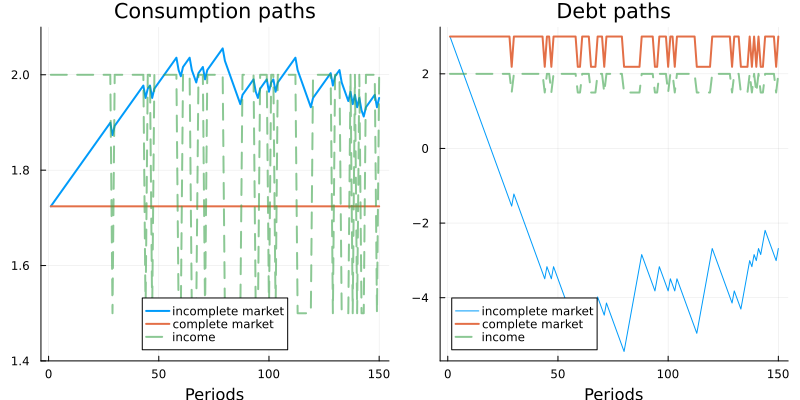

In [4]:
Random.seed!(42)
N_simul = 150
cp = ConsumptionProblem()

c_bar, b1, b2 = consumption_complete(cp)
debt_complete = [b1, b2]

c_path, debt_path, y_path, s_path = consumption_incomplete(cp, N_simul = N_simul)

plt_cons = plot(title = "Consumption paths", xlabel = "Periods", ylim = [1.4, 2.1])
plot!(plt_cons, 1:N_simul, c_path, label = "incomplete market", lw = 2)
plot!(plt_cons, 1:N_simul, fill(c_bar, N_simul), label = "complete market", lw = 2)
plot!(plt_cons, 1:N_simul, y_path, label = "income", lw = 2, alpha = 0.6,
      linestyle = :dash)
plot!(plt_cons, legend = :bottom)

plt_debt = plot(title = "Debt paths", xlabel = "Periods")
plot!(plt_debt, 1:N_simul, debt_path, label = "incomplete market")
plot!(plt_debt, 1:N_simul, debt_complete[s_path], label = "complete market", lw = 2)
plot!(plt_debt, 1:N_simul, y_path, label = "income", lw = 2, alpha = 0.6,
      linestyle = :dash)
plot!(plt_debt, legend = :bottomleft)

plot(plt_cons, plt_debt, layout = (1, 2), size = (800, 400))

In the graph on the left, for the same sample path of nonfinancial
income $ y_t $, notice that

- consumption is constant when there are complete markets, but it takes a random walk in the incomplete markets version of the model  
- the consumer’s debt oscillates between two values that are functions
  of the Markov state in the complete markets model, while the
  consumer’s debt drifts in a “unit root” fashion in the incomplete
  markets economy  

#### Using the Isomorphism

We can simply relabel variables to acquire tax-smoothing interpretations of our two models

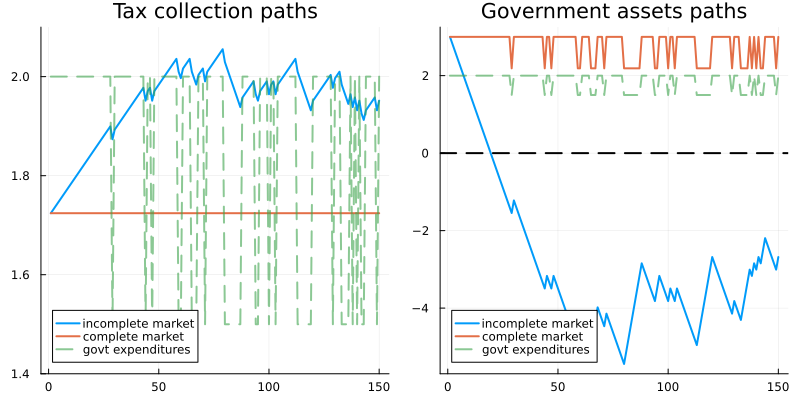

In [5]:
plt_tax = plot(title = "Tax collection paths", x_label = "Periods",
               ylim = [1.4, 2.1])
plot!(plt_tax, 1:N_simul, c_path, label = "incomplete market", lw = 2)
plot!(plt_tax, 1:N_simul, fill(c_bar, N_simul), label = "complete market", lw = 2)
plot!(plt_tax, 1:N_simul, y_path, label = "govt expenditures", alpha = 0.6,
      linestyle = :dash,
      lw = 2)

plt_gov = plot(title = "Government assets paths", x_label = "Periods")
plot!(plt_gov, 1:N_simul, debt_path, label = "incomplete market", lw = 2)
plot!(plt_gov, 1:N_simul, debt_complete[s_path], label = "complete market", lw = 2)
plot!(plt_gov, 1:N_simul, y_path, label = "govt expenditures", alpha = 0.6,
      linestyle = :dash,
      lw = 2)
hline!(plt_gov, [0], linestyle = :dash, color = :black, lw = 2, label = "")
plot(plt_tax, plt_gov, layout = (1, 2), size = (800, 400))

## Example: Tax Smoothing with Complete Markets

It is useful to focus on a simple tax-smoothing example with complete markets.

This example will illustrate how, in a complete markets model like that of Lucas and Stokey [[LS83](https://julia.quantecon.org/../zreferences.html#id104)], the government purchases
insurance from the private sector.

- Purchasing insurance  protects the government against the need to raise taxes too high or issue too much debt in the high government expenditure event.  


We assume that government expenditures move between two values $ G_1 < G_2 $, where Markov state $ 1 $ means “peace” and Markov state $ 2 $ means “war”.

The government budget constraint in Markov state $ i $ is

$$
T_i + b_i = G_i + \sum_j Q_{ij} b_j
$$

where

$$
Q_{ij} = \beta P_{ij}
$$

is the price of one unit of output next period in state $ j $ when
today’s Markov state is $ i $ and $ b_i $ is the government’s
level of *assets* in Markov state $ i $.

That is, $ b_i $ is the amount  of the  one-period loans owned by the government that fall due at time $ t $.

As above, we’ll assume that the initial Markov state is state $ 1 $.

In addition, to simplify our example, we’ll set the government’s initial
asset level to $ 0 $, so that $ b_1 =0 $.

Here’s our code to compute a quantitative example with zero debt in peace time:

In [6]:
# Parameters

beta = 0.96
y = [1.0, 2.0]
b0 = 0.0
P = [0.8 0.2;
     0.4 0.6]

cp = ConsumptionProblem(beta, y, b0, P)
Q = beta * P
N_simul = 150

c_bar, b1, b2 = consumption_complete(cp)
debt_complete = [b1, b2]

println("P = $P")
println("Q = $Q")
println("Govt expenditures in peace and war = $y")
println("Constant tax collections = $c_bar")
println("Govt assets in two states = $debt_complete")

msg = """
Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.
"""
println(msg)

AS1 = Q[1, 2] * b2
println("Spending on Arrow war security in peace = $AS1")
AS2 = Q[2, 2] * b2
println("Spending on Arrow war security in war = $AS2")

println("\n")
println("Government tax collections plus asset levels in peace and war")
TB1 = c_bar + b1
println("T+b in peace = $TB1")
TB2 = c_bar + b2
println("T+b in war = $TB2")

println("\n")
println("Total government spending in peace and war")
G1 = y[1] + AS1
G2 = y[2] + AS2
println("total govt spending in peace = $G1")
println("total govt spending in war = $G2")

println("\n")
println("Let's see ex post and ex ante returns on Arrow securities")

Pi = 1 ./ Q    # reciprocal(Q)
exret = Pi
println("Ex post returns to purchase of Arrow securities = $exret")
exant = Pi .* P
println("Ex ante returns to purchase of Arrow securities = $exant")

P = [0.8 0.2; 0.4 0.6]
Q = [0.768 0.192; 0.384 0.576]
Govt expenditures in peace and war = [1.0, 2.0]
Constant tax collections = 1.3116883116883118
Govt assets in two states = [0.0, 1.6233766233766234]
Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.

Spending on Arrow war security in peace = 0.3116883116883117
Spending on Arrow war security in war = 0.9350649350649349


Government tax collections plus asset levels in peace and war
T+b in peace = 1.3116883116883118
T+b in war = 2.9350649350649354


Total government spending in peace and war
total govt spending in peace = 1.3116883116883118
total govt spending in war = 2.935064935064935


Let's see ex post and ex ante returns on Arrow securities
Ex post returns to purchase of Arrow securities = [1.3020833333333333 5.208333333333333; 2.6041666666666665 1.7361111111111112]
Ex ante returns to purchase of Arrow securities = [1

### Explanation

In this example, the government always purchase $ 0 $ units of the
Arrow security that pays off in peace time (Markov state $ 1 $).

But it purchases a positive amount of the security that pays off in war
time (Markov state $ 2 $).

We recommend plugging the quantities computed above into the government
budget constraints in the two Markov states and staring.

This is an example in which the government purchases *insurance* against
the possibility that war breaks out or continues

- the insurance does not pay off so long as peace continues  
- the insurance pays off when there is war  


*Exercise:* try changing the Markov transition matrix so that

$$
P = \begin{bmatrix}
        1 & 0 \\
       .2 & .8
    \end{bmatrix}
$$

Also, start the system in Markov state $ 2 $ (war) with initial
government assets $ - 10 $, so that the government starts the
war in debt and $ b_2 = -10 $.

## Linear State Space Version of Complete Markets Model

Now we’ll use a setting like that in  [first lecture on the permanent income model](https://julia.quantecon.org/perm_income.html).

In that model, there were

- incomplete markets: the consumer could trade only a single risk-free one-period bond bearing gross one-period risk-free interest rate equal to $ \beta^{-1} $  
- the consumer’s exogenous nonfinancial income was governed by a linear state space model driven by Gaussian shocks, the kind of model studied in an earlier lecture about [linear state space models](https://julia.quantecon.org/../introduction_dynamics/linear_models.html)  


We’ll write down a complete markets counterpart of that model.

So now we’ll  suppose that nonfinancial income is governed by the state
space system

$$
\begin{aligned}
     x_{t+1} & = A x_t + C w_{t+1} \cr
     y_t & = S_y x_t
\end{aligned}
$$

where $ x_t $ is an $ n \times 1 $ vector and $ w_{t+1} \sim {\cal N}(0,I) $ is IID over time.

Again, as a counterpart of the Hall-Barro assumption that the risk-free
gross interest rate is $ \beta^{-1} $, we assume the scaled prices
of one-period ahead Arrow securities are


<a id='equation-cs-14'></a>
$$
p_{t+1}(x_{t+1} \,|\, x_t) = \beta \phi(x_{t+1} \,|\, A x_t, CC') \tag{40.15}
$$

where $ \phi(\cdot \,|\, \mu, \Sigma) $ is a multivariate Gaussian
distribution with mean vector $ \mu $ and covariance matrix
$ \Sigma $.

Let $ b(x_{t+1}) $ be a vector of state-contingent debt due at $ t+1 $
as a function of the $ t+1 $ state $ x_{t+1} $.

Using the pricing function assumed in [(40.15)](#equation-cs-14), the value at
$ t $ of $ b(x_{t+1}) $ is

$$
\beta \int b(x_{t+1}) \phi(x_{t+1} \,|\, A x_t, CC') d x_{t+1} = \beta  \mathbb E_t b_{t+1}
$$

In the complete markets setting, the consumer faces a sequence of budget
constraints

$$
c_t + b_t = y_t + \beta \mathbb E_t b_{t+1}, t \geq 0
$$

We can solve the time $ t $ budget constraint forward to obtain

$$
b_t = \mathbb E_t  \sum_{j=0}^\infty \beta^j (y_{t+j} - c_{t+j} )
$$

We assume as before that the consumer cares about the expected value
of

$$
\sum_{t=0}^\infty \beta^t u(c_t), \quad 0 < \beta < 1
$$

In the incomplete markets version of the model, we assumed that
$ u(c_t) = - (c_t -\gamma)^2 $, so that the above utility functional
became

$$
-\sum_{t=0}^\infty \beta^t ( c_t - \gamma)^2, \quad 0 < \beta < 1
$$

But in the complete markets version, we can assume a more general form
of utility function that satisfies $ u' > 0 $ and $ u'' < 0 $.

The first-order condition for the consumer’s problem with complete
markets and our assumption about Arrow securities prices is

$$
u'(c_{t+1}) = u'(c_t) \quad \text{for all }  t\geq 0
$$

which again implies $ c_t = \bar c $ for some $ \bar c $.

So it follows that

$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j (y_{t+j} - \bar c)
$$

or


<a id='equation-cs-15'></a>
$$
b_t = S_y (I - \beta A)^{-1} x_t - \frac{1}{1-\beta} \bar c \tag{40.16}
$$

where the value of $ \bar c $ satisfies


<a id='equation-cs-16'></a>
$$
\bar b_0 = S_y (I - \beta A)^{-1} x_0 - \frac{1}{1 - \beta } \bar c \tag{40.17}
$$

where $ \bar b_0 $ is an initial level of the consumer’s debt, specified
as a parameter of the problem.

Thus, in the complete markets version of the consumption-smoothing
model, $ c_t = \bar c, \forall t \geq 0 $ is determined by [(40.17)](#equation-cs-16)
and the consumer’s debt is a fixed function of
the state $ x_t $ described by [(40.16)](#equation-cs-15).

Here’s an example that shows how in this setting the availability of insurance against fluctuating nonfinancial income
allows the consumer completely to smooth consumption across time and across states of the world.

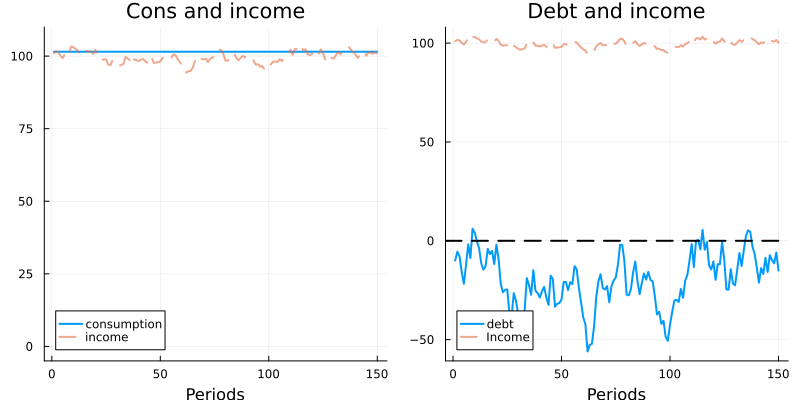

In [7]:
function complete_ss(beta, b0, x0, A, C, S_y, T = 12)

    # Create a linear state space for simulation purposes
    # This adds "b" as a state to the linear state space system
    # so that setting the seed places shocks in same place for
    # both the complete and incomplete markets economy
    # Atilde = vcat(hcat(A, zeros(size(A,1), 1)),
    #               zeros(1, size(A,2) + 1))
    # Ctilde = vcat(C, zeros(1, 1))
    # S_ytilde = hcat(S_y, zeros(1, 1))

    lss = LSS(A, C, S_y, mu_0 = x0)

    # Add extra state to initial condition
    # x0 = hcat(x0, 0)

    # Compute the (I - beta*A)^{-1}
    rm = inv(I - beta * A)

    # Constant level of consumption
    cbar = (1 - beta) * (S_y * rm * x0 .- b0)
    c_hist = ones(T) * cbar[1]

    # Debt
    x_hist, y_hist = simulate(lss, T)
    b_hist = (S_y * rm * x_hist .- cbar[1] / (1.0 - beta))

    return c_hist, vec(b_hist), vec(y_hist), x_hist
end

N_simul = 150

# Define parameters
alpha, rho1, rho2 = 10.0, 0.9, 0.0
sigma = 1.0
# N_simul = 1
# T = N_simul
A = [1.0 0.0 0.0;
     alpha rho1 rho2;
     0.0 1.0 0.0]
C = [0.0, sigma, 0.0]
S_y = [1.0 1.0 0.0]
beta, b0 = 0.95, -10.0
x0 = [1.0, alpha / (1 - rho1), alpha / (1 - rho1)]

# Do simulation for complete markets
out = complete_ss(beta, b0, x0, A, C, S_y, 150)
c_hist_com, b_hist_com, y_hist_com, x_hist_com = out

# Consumption plots
plt_cons = plot(title = "Cons and income", xlabel = "Periods", ylim = [-5.0, 110])
plot!(plt_cons, 1:N_simul, c_hist_com, label = "consumption", lw = 2)
plot!(plt_cons, 1:N_simul, y_hist_com, label = "income",
      lw = 2, alpha = 0.6, linestyle = :dash)

# Debt plots
plt_debt = plot(title = "Debt and income", xlabel = "Periods")
plot!(plt_debt, 1:N_simul, b_hist_com, label = "debt", lw = 2)
plot!(plt_debt, 1:N_simul, y_hist_com, label = "Income",
      lw = 2, alpha = 0.6, linestyle = :dash)
hline!(plt_debt, [0], color = :black, linestyle = :dash, lw = 2, label = "")
plot(plt_cons, plt_debt, layout = (1, 2), size = (800, 400))
plot!(legend = :bottomleft)

### Interpretation of Graph

In the above graph, please note that:

- nonfinancial income fluctuates in a stationary manner  
- consumption is completely constant  
- the consumer’s debt fluctuates in a stationary manner; in fact, in
  this case because nonfinancial income is a first-order
  autoregressive process, the consumer’s debt is an exact affine function
  (meaning linear plus a constant) of the consumer’s nonfinancial
  income  

### Incomplete Markets Version

The incomplete markets version of the model with nonfinancial income being governed by a linear state space system
is described in the first lecture on the [permanent income model](https://julia.quantecon.org/perm_income.html) and the followup
lecture on  the [permanent income model](https://julia.quantecon.org/perm_income_cons.html).

In that version, consumption follows a random walk and the consumer’s debt follows a process with a unit root.

We leave it to the reader to apply the usual isomorphism to deduce the corresponding implications for a tax-smoothing model like Barro’s [[Bar79](https://julia.quantecon.org/../zreferences.html#id65)].

### Government Manipulation of  Arrow Securities Prices

In [optimal taxation in an LQ economy](https://julia.quantecon.org/../dynamic_programming_squared/lqramsey.html) and [recursive optimal taxation](https://julia.quantecon.org/../dynamic_programming_squared/opt_tax_recur.html), we study **complete-markets**
models in which the government recognizes that it can manipulate  Arrow securities prices.

In [optimal taxation with incomplete markets](https://julia.quantecon.org/../dynamic_programming_squared/amss.html), we study an **incomplete-markets** model in which the government  manipulates asset prices.